In [1012]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1013]:
df=pd.read_csv('train.csv')
df.shape

(1460, 81)

In [1014]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1015]:
input = df.drop(['SalePrice','Id','MSZoning','Alley', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish'], axis=1)
target = df['SalePrice']

In [1016]:
na=input.columns[input.isna().sum()>0].tolist()
input[na].head(10)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,NaN,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


In [1017]:
input.fillna({
    'LotFrontage':input['LotFrontage'].mean(),
    'MasVnrArea':0,
    'GarageYrBlt':input['GarageYrBlt'].mean()
},inplace=True)

In [1018]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=99)
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
542,20,78.000000,10140,7,5,1998,1999,0.0,144,1127,...,583,78,73,0,0,0,0,0,6,2009
1406,85,70.000000,8445,5,7,1972,2007,0.0,656,0,...,396,58,0,0,0,0,0,0,3,2009
338,20,91.000000,14145,7,7,1984,1998,0.0,213,0,...,440,108,45,0,0,0,0,400,5,2006
17,90,72.000000,10791,4,5,1967,1967,0.0,0,0,...,516,0,0,0,0,0,0,500,10,2006
1313,60,108.000000,14774,9,5,1999,1999,165.0,0,0,...,779,668,30,0,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,50,60.000000,8400,6,5,1925,1950,0.0,423,0,...,576,342,0,128,0,0,0,0,6,2008
1192,50,60.000000,9600,5,8,1925,1994,0.0,0,0,...,250,0,0,84,0,0,0,0,7,2007
1209,20,85.000000,10182,8,5,2006,2006,420.0,1220,0,...,500,322,50,0,0,0,0,0,5,2006
1059,50,70.049958,11275,6,7,1932,1950,480.0,297,557,...,432,0,0,19,0,0,0,0,3,2007


In [1034]:
lr=LinearRegression()
lr.fit(x_train,y_train)
accuracy=lr.score(x_test,y_test)
print(f'Accuracy of the model is : {round(accuracy*100,2)}%')

Accuracy of the model is : 85.54%


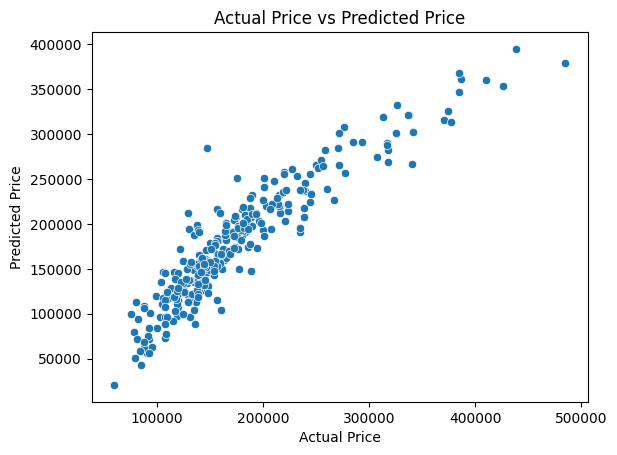

In [1037]:
sns.scatterplot(x=y_test,y=lr.predict(x_test))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [1021]:
import joblib
joblib.dump(lr,'house_price_prediction_model')

['house_price_prediction_model']

In [1022]:
model=joblib.load('house_price_prediction_model')

In [1023]:
test=pd.read_csv('test.csv')
test_data=pd.read_csv('test.csv')

In [1024]:
columns_to_drop = []
for col in test_data.columns:
    if col not in input.columns:
        columns_to_drop.append(col)
test_data.drop(columns=columns_to_drop, inplace=True)


In [1025]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [1026]:
test_na=test_data.columns[test_data.isna().sum()>0].tolist()
test_data[test_na]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.0,2.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0


In [1027]:
test_data['GarageYrBlt'].ffill(inplace=True)
test_data.fillna(0,inplace=True)

C:\Users\shemi\AppData\Local\Temp\ipykernel_24928\1870515047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['GarageYrBlt'].ffill(inplace=True)


In [1028]:
predicted_data=test
predicted_data['pred_price']=model.predict(test_data)
predicted_data[['Id','pred_price']]

,Id,pred_price
0,1461,113828.938263
1,1462,145761.422249
2,1463,172109.351355
3,1464,199369.689478
4,1465,200193.495027
...,...,...
1454,2915,56194.972661
1455,2916,67138.705153
1456,2917,165940.519630
1457,2918,100469.359108
